# Исследование о рынке российского кинопроката

## Описание проекта 

<b>Цель:</b> используя данные государственного портала и сервиса “КиноПоиск”, проведите исследование, изучите текущие тренды и визуализируйте полученные результаты.<br>
<b>Описание:</b> Заказчик этого исследования — Министерство культуры Российской Федерации.
Нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Попробовать ответить на вопрос, насколько такие фильмы интересны зрителю.
Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

## Шаг 1. Откройте файлы с данными и объедините их в один датафрейм 

In [1]:


import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from itertools import zip_longest


server_path = '/datasets/mkrf_movies.csv'   
local_path= 'datasets/mkrf_movies.csv'              

try:
    data = pd.read_csv(server_path)    
except: 
    data = pd.read_csv(local_path)

server_path = '/datasets/mkrf_shows.csv'   
local_path= 'datasets/mkrf_shows.csv'               

try:
    data1 = pd.read_csv(server_path)    
except: 
    data1 = pd.read_csv(local_path)

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [4]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
data1.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


Проверим строки со значением 'нет'

In [6]:
display(data[data['puNumber'] == 'нет'])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
display(data[data['title'] == 'Курбан-роман. (История с жертвой)'])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Поменяем значение 'нет' на '111009614' для преобразования столбцов в int()

In [8]:


data['puNumber'] = np.where((data.puNumber == 'нет'), '111009614', data.puNumber)
display(data[data['puNumber'] == '111009614'])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),111009614,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
2078,Курбан-роман. (История с жертвой).,111009614,2014-09-02T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data['puNumber'] = data['puNumber'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [10]:
#объединим два датафрейма по столбцу puNumber
df = pd.merge(data, data1, how='left')

In [11]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

После объединения значений в столбце box_office увеличилось на 1. Это может быть связано с дублирующей строкой.

### Вывод 1.1 

На данном этапе мы объединили два датафрейма вместе. В ходе исследования выяснилось что столбец "puNumber" в двух датафреймах имеет различный тип данных. Оба столбца были приведены к общему типу данных int(). Доля этого пришлось изменить одно значение в data 'нет' на '111009614', номер прокатного удостоверения взят из следующего источника: https://culture.gov.ru/services/reestr-prokatnykh-udostovereniy/472371/ 

## Шаг 2. Предобработка данных 

Проверим типы данных в датафрейме

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

2015-11-27T12:00:00.000Z
Преобразуем столбец "show_start_date" в типа данных datetime.

In [14]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

Далее преобразуем столбец с рейтингом фильмав в вещественный тип. Для этого проанализируем уникальные значения в столбцах и обработаем те данные которые представленный не в подходящем формате или отсутвуют.

Найдем пропуски по всем столбцам

In [15]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
dtype: int64

In [16]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [17]:
display(df[(df['ratings'] == '99%') 
           | (df['ratings'] == '99%')  
           | (df['ratings'] == '97%')  
           | (df['ratings'] == '83%')
           | (df['ratings'] == '64%')
           | (df['ratings'] == '91%')
           | (df['ratings'] == '94%')
           | (df['ratings'] == '62%')
           | (df['ratings'] == '79%')
           | (df['ratings'] == '90%')
           | (df['ratings'] == '19%')
           | (df['ratings'] == '88%')
           | (df['ratings'] == '89%')
           | (df['ratings'] == '98%')
           | (df['ratings'] == 'nan')])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29 12:00:00+00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма",NaN
1053,Песочный человек,121029212,2012-11-29 12:00:00+00:00,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,97%,"ужасы,фантастика,фэнтези",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00+00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив",NaN
1805,Спираль.,111001014,2014-01-30 12:00:00+00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы","4,295.00"
1874,Короткие истории о любви 2,121002615,2015-02-13 12:00:00+00:00,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,"1,429,859.00"
1899,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-27 12:00:00+00:00,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,64%,"мюзикл,фэнтези,мелодрама","528,732,557.70"
2126,Поездка к матери,111002015,2015-03-02 12:00:00+00:00,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,91%,"драма,семейный",0.00
2146,Главный,111003415,2015-03-27 12:00:00+00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.00,"10,000,000.00","40,000,000.00",Министерство культуры,94%,"фантастика,боевик,комедия","334,750.00"
2438,Самый рыжий Лис,111012715,2015-07-30 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,62%,"фэнтези,семейный",NaN
2680,Год Белого Слона,111003915,2015-04-08 12:00:00+00:00,Художественный,"ООО ""Творческое объединение ЮГ""",Россия,Ю.Грымов,П.Поляков,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,79%,семейный,NaN


В столбце "" в место рейтинга фильма указано значение в процентах, для того чтобы востановить рейтинг фильмов был использовани источник сайт кинопоиска. Была написана функция для парсинга сайта. Колонки где информация о рейтинге отсутвует принято решение не заполнять значение

In [18]:
k = 0
def rating_films(row):
    name_film = row['title']
    director_film = row['director']
    ratings_film = row['ratings']
    global k
    if ('%' in str(ratings_film)) or ('nan' in str(ratings_film)) or (ratings_film == '') or (ratings_film == None) or ('NaN' in str(ratings_film)) or ('?' in str(ratings_film)):

        # добавляем название фильма к адрессу поиска фильмов на сайте кинпоиск
        url = 'https://www.kinopoisk.ru/index.php?kp_query=' + name_film
        web = {'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.1 Safari/605.1.15'}
        web_page = requests.get(url)
        html_tag = BeautifulSoup(web_page.content, 'html.parser')
        # подключаемся необходимым блокам для выгрузки данных
        c1 = html_tag.findAll("p", {"class": "name"})
        c2 = html_tag.findAll("div", {"class": "right"})
        name = []
        director = []
        reg = []
        print('☃', end='')
        for i in range(len(c1)):
            # конкретизируем какие данные о фильмах забираем
            m = c1[i].findAll("a", {"class": "js-serp-metrika"})
            y = c1[i].findAll("a", {"class": "lined js-serp-metrika"})

            for j in m:
                name.append(j.text)

            for j1 in y:
                director.append(j1.text)

        for i in range(len(c2)):

            r = c2[i].findAll("div", {"class": "rating"})


            for j in r:
                reg.append(j.text)

        

        films = list(zip_longest(name, director, reg, fillvalue='?'))




        for i in range(len(films)):
            t = films[i][0]
            t1 = films[i][1]

            if (name_film.lower() in t.lower()) and ('%' in str(ratings_film)):
                k += 1
                return films[i][2].strip()
            elif (name_film.lower() in t.lower()) and (('nan' in str(ratings_film)) or (ratings_film == '') or (ratings_film == None) or ('NaN' in str(ratings_film))):
                k += 1
                return films[i][2].strip()
            else:
                pass
    elif ratings_film:
        return ratings_film.strip()
    else:
        pass


df['ratings'] = df.apply(rating_films, axis=1) 
print('ok', 'найдено:', k)

☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃ok н

Как видно после парсинга наденно 240 недостоющих рейтингов. Было пропусков 967

In [19]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', None, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2',
       '5.6', '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5',
       '5.1', '5.7', '5.4', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '2.9', '3.9', '2.7', '3.3', '?', '3.7', '1.4', '3.1', '3.5',
       '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1', '3.6',
       '1.0', '1.3', '1.9', '1.8', '1.2', '1.7', '9.0', '8.9', '9.1'],
      dtype=object)

In [20]:
display(df[(df['ratings'] == '?')])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
881,Президент и бомж,131000312,2012-09-05 12:00:00+00:00,Художественный,"ООО ""Акбата Фильм""",Киргизия,Ырыс Окенова,Омурзак Толобеков,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,?,NaN,NaN
899,Фэтбой Слим Лайв,126002312,2012-08-29 12:00:00+00:00,Прочие,"Полиграм Мьюзик Пабл, Соутерн Френд Рекордс, Э...",Австралия,Мэт Аскем,"Гэрри Блэкберн, Норман Кук, Селия Мор, Джастин...",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,?,NaN,NaN
2374,Живало-бывало,111022914,2014-12-02 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Эрн""",Россия,Е.Барханов,"А.Морозов, В.Орел",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,?,NaN,NaN
2381,Звёздная карта,121029014,2014-12-17 12:00:00+00:00,Художественный,"Просперо Пикчерз, Сентиент Интертейнмент, Эс Б...",Канада - США - Германия - Франция,Дэвид Кроненберг,"Мартин Кац, Мишель Меркт, Саид Бен Саид",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,?,NaN,"123,190.00"
2529,Чёрная месса,121021415,2015-10-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Кросс Крик Пикчерз, Гризби Про...",США,Скотт Купер,"Джон Лешер, Брайан Оливер",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,?,NaN,"136,223,214.80"
2695,МУЛЬТ в кино. Выпуск № 12,114002115,2015-08-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница"", ООО...",Россия-Кипр,"В.Пономарёв, А.Миронов, Е.Салабай, Н.Мальгина","Т.Цыварева, А.Златопольский, В.Воля, Е.Головин...",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,?,NaN,"2,591,302.50"
3431,Наурыз,131000217,2017-03-09 12:00:00+00:00,Художественный,Эс Джи,Республика Казахстан,Аскар Бисембин,"Олег Головашкин, Алмас Султангазин",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,?,комедия,"37,960.00"
3447,Апостасия,111000317,2017-01-18 12:00:00+00:00,Художественный,"ООО ""ТПО Кинокомпания М2Ф""",Россия,А.Мурадов,"А.Мурадов, Р.Филатов, А.Голодницкий",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,?,NaN,NaN
4936,БИРМИНГЕМСКИЙ ОРНАМЕНТ,111006611,2011-10-03 12:00:00+00:00,Художественный,Фонд поддержки независимого и экспериментально...,Россия,"Ю.Лейдерман, А.Сильвестров",А.Сильвестров,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,?,NaN,NaN
5816,Невероятные приключения Нильса,214003818,2018-04-16 12:00:00+00:00,Анимационный,"ООО ""АА студио""",Россия,А.Котёночкин,"А.Митрошенков, Н.Гюзалян, А.Ованнисян",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,?,NaN,NaN


In [21]:
df['ratings'] = np.where((df.ratings == '?'), None, df.ratings)

 После чего приведем столбец к единому типу данных float

In [22]:
df['ratings'] = df['ratings'].astype('float')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [24]:
df['ratings'].isna().sum()

795

Вывод: как видно после парсинга и заполнения данных, остались еще данные с прощенными значениями.

Рассмотрим значения в стоблце director.

In [25]:
df['director'].isna().sum()

9

Заполним по аналогии с рейтингом данные в столбце director

In [26]:
df['director'] = df['director'].fillna('нет данных')
display(df[(df['director'] == 'нет данных')])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,нет данных,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,"44,350.00"
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,нет данных,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,нет данных,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,нет данных,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,нет данных,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,нет данных,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,нет данных,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,нет данных,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,нет данных,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN


Аналагичным способом заполним пропуски в стобцах producer и film_studio 

In [27]:
df['producer'].isna().sum()

568

In [28]:
df['producer'] = df['producer'].fillna('нет данных')
display(df[(df['producer'] == 'нет данных')])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,нет данных,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,нет данных,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,нет данных,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00"
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,нет данных,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,нет данных,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"боевик,драма,приключения",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,Отряд специального назначения,111020419,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,нет данных,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.00,"приключения,военный",NaN
7406,Назначаешься внучкой,111020519,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,нет данных,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,военный,NaN
7407,Перед рассветом,111020619,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,нет данных,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"драма,мелодрама",NaN
7408,Ты помнишь,111020719,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,О.Николаевский,нет данных,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,"драма,мелодрама,военный",NaN


In [29]:
df['film_studio'].isna().sum()

18

In [30]:
df['film_studio'] = df['film_studio'].fillna('нет данных')
display(df[(df['film_studio'] == 'нет данных')])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,нет данных,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,нет данных,NaN,нет данных,нет данных,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,нет данных,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.00,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,нет данных,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,нет данных,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,нет данных,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,нет данных,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"41,225.00"
6485,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,нет данных,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.90,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,нет данных,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,нет данных,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Данные в столбцах  financing_source, production_country данные схожи, возможно предположить сто тут представленны только данные по фильмам которые финансировались государством. Пропуски решено заполнить как "нет данных"

In [31]:


df['financing_source'] = df['financing_source'].fillna('нет данных')
df['production_country'] = df['production_country'].fillna('нет данных')

Были так же проанализированы количественные значения refundable_support, nonrefundable_support, budget. Было решено пропуски не заполнять значением

In [32]:

df['refundable_support'] = df['refundable_support'].astype('float')
df['nonrefundable_support'] = df['nonrefundable_support'].astype('float')


df['budget'] = df['budget'].astype('float')

Так же заменим нулевые значения на пустоту

In [33]:
data['refundable_support'] = data['refundable_support'].replace(float('inf'), np.nan)
data['nonrefundable_support'] = data['nonrefundable_support'].replace(float('inf'), np.nan)
data['budget'] = data['budget'].replace(float('inf'), np.nan)

Теперь проанализируем столбец жанры фильмов.

In [34]:
df['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

Как видно в стоблце с жанрами чень много различных вариантов, в дальнейшем выберем из списков только главные жанры фильмов.

In [35]:
df['genres'].isna().sum()

976

Как видно в данном столбце довольно много пропусков. На данном этапе заполним данные пропуски как "нет данных"

In [36]:
df['genres'] = df['genres'].fillna('нет данных')

Проанализируем данные в столбце box_office 

In [37]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Как видно в данном столбце представлены данные во всех строках, о сборах в рублях которых было известон из датафрейма mkrf_shows . Так как данные в этом столбце являются количественными, решено пропуски не заполнять.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7486 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Далее выполним поиск явных дубликатов

In [39]:
df.duplicated().sum()

0

Далее поищем дубликаты в столбцах: •	title и •	puNumber. 

In [40]:
print('дубликаты в столбце title:', df['title'].duplicated().sum(), end='\t')
print('дубликаты в столбце puNumber:', df['puNumber'].duplicated().sum(), end='\t')

дубликаты в столбце title: 714	дубликаты в столбце puNumber: 3	

In [41]:
print(df['title'].value_counts().head(10))

День святого Валентина_                5
Дорога /По новелле Кормака МкКарфи/    4
Лузеры                                 4
Непокоренный.                          4
Рапунцель: Запутанная история          4
Химера                                 4
Прощание                               4
Знакомство с Факерами 2.               4
Там, где живут чудовища                4
Секс в большом городе 2                4
Name: title, dtype: int64


In [42]:
print(df['puNumber'].value_counts().head())

221154310    2
111009614    2
221054410    2
111008518    1
114002716    1
Name: puNumber, dtype: int64


Вывод: данные дубли могли появиться по причине того что многие фильмы имеют несколько прокатных удостоверений. Данное утверждение можно сделать сравнив кол-во дублей в названиях и номерах прокатных удостоверений.

Столбцы, которые имеют категориальные значения: type, production_country, age_restriction, genres, film_studio,	director, producer   

In [43]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Как видно встречаются следующие проблемные начения(из-за разного написания они дублируются): Художественный, Анимационный

In [44]:
df['type'] = df['type'].replace(' Художественный', 'Художественный')
df['type'] = df['type'].replace(' Анимационный', 'Анимационный')
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [45]:
df['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

Как видно получился довольно большой список уникальных значений. Это связано с тем, что есть фильмы, которые снимались в нескольих странах. ДЛя того чтобы было проще категоризировать их, напишем функцию которая меняет строки с несколькими странами на одну - главную(которая записана первой)

In [46]:
def country(cnt):
    if '-' in cnt:
        return cnt.split('-')[0].strip()
    else:
        return cnt.strip()
df['production_country'] = df['production_country'].apply(country)
df['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия', 'Германия',
       'Великобритания', 'Чехословакия', 'Новая Зеландия', 'Канада',
       'Россия, Казахстан, США', 'СССР, Швеция',
       'СССР, Франция, Англия, Куба, ГДР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'Гонконг', 'Ирландия', 'Чехия', 'СССР, Финляндия', 'Люксембург',
       'Япония', 'СССР, Польша', 'Аргентина', 'Дания', 'Австрия',
       'Россия', 'Италия', 'КНР', 'Швеция', 'Испания', 'Мексика',
       'Бразилия', 'Чили', 'Австралия', 'Португалия', 'Исландия',
       'Южная Корея', 'Бельгия', 'Украина', 'Босния и Герцеговина',
       'Норвегия', 'Швейцария', 'Греция', 'Норвения', 'Грузия',
       'Финляндия', 'Израиль', 'Иран', 'Нидерланды',
       'Республика Узбекистан', 'Турция', 'Сербия', 'Киргизия', 'Индия',
       'Польша', 'Армения', 'ЮАР', 'Республика Беларусь', 'Румыния',
       'Болгария', 'Россия, Германия, Франция, Бельгия', 'Индонезия',
       'СССР, ФРГ, Западный Берлин'

In [47]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

В столбцу "age_restriction" проблемных значений в категориях не выявленно

In [48]:
df['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'нет данных', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'ко

Для данной категории напишем аналагичную функция, как и для столбца 'production_country'.

In [49]:
def genres(cnt):
    if ',' in cnt:
        return cnt.split(',')[0].strip()
    else:
        return cnt.strip()
df['genres_new'] = df['genres'].apply(genres)
df['genres_new'].unique()

array(['боевик', 'драма', 'фантастика', 'мелодрама', 'мюзикл', 'комедия',
       'триллер', 'ужасы', 'мультфильм', 'нет данных', 'военный',
       'документальный', 'фэнтези', 'криминал', 'приключения', 'аниме',
       'детектив', 'для взрослых', 'семейный', 'концерт', 'история',
       'короткометражка', 'детский', 'спорт', 'биография', 'вестерн',
       'музыка', 'фильм-нуар', 'реальное ТВ'], dtype=object)

In [50]:
df['film_studio'].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [51]:
df['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [52]:
def director(cnt):
    if ',' in cnt:
        return cnt.split(',')[0].strip()
    else:
        return cnt.strip()
df['director_new'] = df['director'].apply(director)
df['director_new'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [53]:
df['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', 'нет данных',
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

Далее создадим столбец с годом выхода фильма.

In [54]:
df['year'] = df['show_start_date'].dt.year
df['year'].unique()

array([2015, 2016, 2013, 2014, 2012, 2017, 2010, 2011, 2018, 2019])

Вывод:  почти во всех столбцах встречается похожая проблема - это большой набор категорий в одной строке, что осложняет работу с данной информацией.

Проверим что значение в столбце budget не превышвет полный объем гос. поддержки фильмов

In [55]:
otv = df[df['budget'] < df['nonrefundable_support'] + df['refundable_support']]
display(otv, otv['budget'].count())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,genres_new,director_new,year
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10",мелодрама,А.Зайцев,2014
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00",драма,Р.Прыгунов,2015
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40",боевик,А.Андрианов,2015
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80",комедия,Д.Штурманова,2015
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40",мультфильм,М.Фадеев,2015
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51",комедия,М.Местецкий,2015
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20",комедия,С Чекалов,2015
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43",комедия,В.Ровенский,2016
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00",комедия,Д.Тюрин,2016
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00",фантастика,Ф.Бондарчук,2016


17

Как видно из получившегося результат таких фильмов нашлось 17шт. В этот список попали фильмы информация о бюджете неизвестна. Заменим нули на пропуски

In [56]:
data['budget'] = data['budget'].replace(float('inf'), np.nan)

Далее посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка и сохраним результат в новый столбец "government_help"

In [57]:
df['government_help'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']
df.sort_values(by='government_help', ascending=True).head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,genres_new,director_new,year,government_help
5600,За гранью реальности,111010817,2017-11-27 12:00:00+00:00,Художественный,"ООО ""КИНОДАНЦ""",Россия,А.Богуславский,"В.Денисюк, Е.Мелентьев",«12+» - для детей старше 12 лет,0.00,"6,000,000.00","136,230,333.00",Министерство культуры,5.20,"приключения,фэнтези","126,713,450.16",приключения,А.Богуславский,2017,0.04
3732,Танцы насмерть,111013416,2016-08-31 12:00:00+00:00,Художественный,"ООО ""КИНОДАНЦ"", ООО ""ЦЕНТРОКИНО""",Россия,А.Волгин,"В.Денисюк, Е.Мелентьев",«12+» - для детей старше 12 лет,0.00,"6,000,000.00","90,278,063.00",Министерство культуры,4.00,фантастика,"9,680,744.00",фантастика,А.Волгин,2016,0.07
7171,Грех,111014419,2019-08-31 12:00:00+00:00,Художественный,НО Фонд Андрея Кончаловского по поддержке кино...,"Россия, Италия",А.Михалков (псевдоним А.Кончаловский),НО Фонд Андрея Кончаловского по поддержке кино...,«16+» - для детей старше 16 лет,0.00,"60,000,000.00","779,941,965.00",Министерство культуры,6.90,"драма,биография,история","54,243,202.71",драма,А.Михалков (псевдоним А.Кончаловский),2019,0.08
7180,Байкал - Сердце мира 3D,112004619,2019-11-01 12:00:00+00:00,Документальный,"ООО ""Продюсерский центр ""Новое Время""",Россия,А.Попова,"И.Добровольский, А.Разуваева, Ю.Перкуль",«0+» - для любой зрительской аудитории,0.00,"3,000,000.00","33,000,000.00",Министерство культуры,8.00,семейный,NaN,семейный,А.Попова,2019,0.09
3042,Крякнутые каникулы,114003615,2015-12-22 12:00:00+00:00,Анимационный,"ООО ""Анимационная студия РИМ""",Россия,В.Лакисов,"Р.Атоян, В.Зорин, О.Бровченко",«6+» - для детей старше 6 лет,"40,000,000.00",0.00,"399,075,326.00",Фонд кино,5.40,"мультфильм,комедия,приключения","69,693,747.93",мультфильм,В.Лакисов,2015,0.10


Рассмотрим, как распределены наши данные, есть ли в них аномально большие или аномально маленькие значения. 

Можно применить метод describe() и мы увидим минимальные, средние и максимальные значения, характеристики распределения. Для визуализации того как распределены данные можно построить диаграммы размаха методом boxplot() (или гистограммы методом hist()), на которых мы увидим аномальные значения.

Выполни, пожалуйста, этот шаг по анализу распределения данных во всех количественных столбцах: refundable_support, nonrefundable_support, budget, ratings, box_office.

In [58]:
df[df['refundable_support'] > 0 ]['refundable_support'].describe()

count           111.00
mean     35,486,486.49
std      31,972,875.36
min       3,500,000.00
25%      15,000,000.00
50%      25,000,000.00
75%      50,000,000.00
max     180,000,000.00
Name: refundable_support, dtype: float64

<AxesSubplot:>

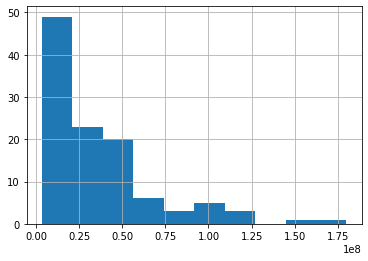

In [59]:
df[df['refundable_support'] > 0 ]['refundable_support'].hist()

In [60]:
df[df['nonrefundable_support'] > 0]['nonrefundable_support'].describe()

count           323.00
mean     50,345,784.25
std      60,243,206.31
min       3,000,000.00
25%      25,000,000.00
50%      30,000,000.00
75%      45,000,000.00
max     400,000,000.00
Name: nonrefundable_support, dtype: float64

<AxesSubplot:>

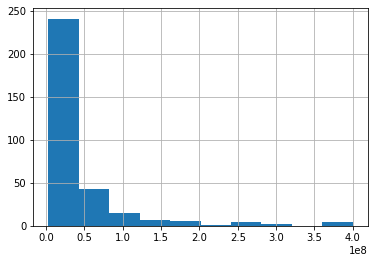

In [61]:
df[df['nonrefundable_support'] > 0]['nonrefundable_support'].hist()

In [62]:
df['budget'].describe()

count             332.00
mean      127,229,716.68
std       188,588,333.12
min                 0.00
25%        42,000,000.00
50%        68,649,916.00
75%       141,985,319.50
max     2,305,074,303.00
Name: budget, dtype: float64

<AxesSubplot:>

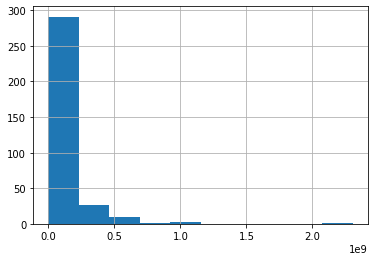

In [63]:
df['budget'].hist()

In [64]:
df['ratings'].describe()

count   6,691.00
mean        6.48
std         1.10
min         1.00
25%         5.90
50%         6.60
75%         7.20
max         9.20
Name: ratings, dtype: float64

<AxesSubplot:>

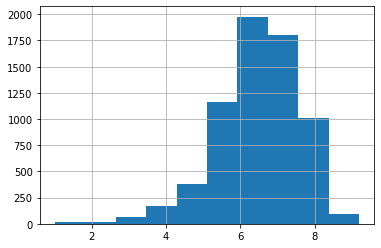

In [65]:
df['ratings'].hist()

In [66]:
df[df['box_office'] > 0]['box_office'].describe()

count           3,134.00
mean       77,064,365.82
std       241,178,383.77
min                40.00
25%           101,028.75
50%         2,409,099.35
75%        24,569,794.87
max     3,073,568,690.79
Name: box_office, dtype: float64

Для того чтобы посмотреть детальней причина расхождений в среднем и мидианном значении посмотрим детальней на данные.

<AxesSubplot:>

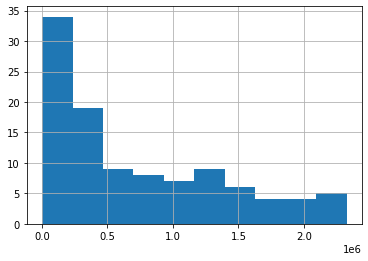

In [135]:
df[(df['box_office'] < 2409099) & (df['box_office'] > 0)]['box_office'].hist()

<AxesSubplot:>

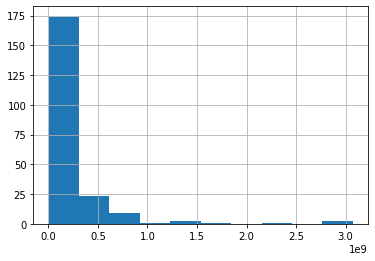

In [137]:
df[df['box_office'] > 2409099]['box_office'].hist()

<a id='otv'></a>
Вывод: Как видно из графика видно что кол-во фильмов с увеличением бюджета заметно уменьшаешться,  так же видно в средней учитываются аномально низкие сборы, которые не попадают в выборку при подсчете медианы. Тем самым среднее и медиана сборов различается из-за разным способов подсчета, где в одном случае учитыватся очень низкие сборы, в другом нет.

<AxesSubplot:>

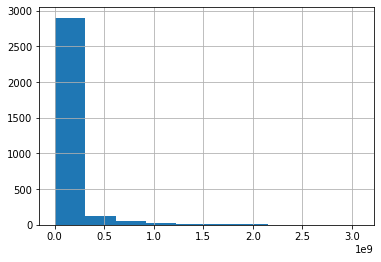

In [68]:
df[df['box_office'] > 0]['box_office'].hist()

Вывод: как видно из полученных данных практически во всех столбцах очень сильное стандартное отклонение. Только в столбцей рейтинга наблюдается не сильное отклонение и график похож на нормальное распределение. Такое возможно из-за очень большого финансирования определенных фильмов. Фильмов с большим бюджетом намного меньше, чем фильмов с маленьким.

### Вывод 2.1 

На втором этапе мы проанализировали данные в столбцах. При помощи парсенга данных сайта кинопоиск были востановлены значения рейтинга в фильмах (были указаны в процентах). Были проанализированы категориальные и количественные значения. При анализе категориальных значений было замечено, что во многих столбцах содержиться большой набор вариантов в строках, для того чтобы упростить работу, было решено сделать функции, которые выбирают основные значения из столбцов и записывают их в новые. Так же была посчитана доля участия государства в финансировании фильмов.

## Шаг 3. Проведите исследовательский анализ  

•	Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

Просмотрим, сколько фильмов выходило каждый год:

In [69]:
df['year'].value_counts()

2010    985
2019    930
2018    891
2016    818
2014    807
2015    705
2013    630
2011    622
2012    593
2017    505
Name: year, dtype: int64

<AxesSubplot:>

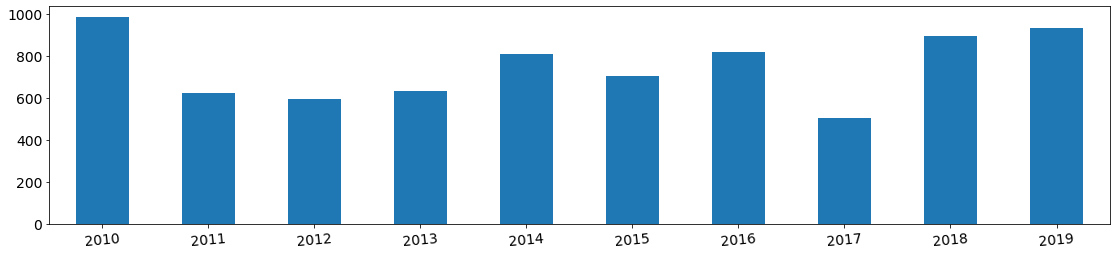

In [70]:
df['year'].value_counts().sort_index(ascending=True).plot(x="year", y="box_office", kind="bar", rot=5, fontsize=14, figsize=(19,4))

Посчитаем фильмы информация в которых о прокате  ghbcendetn

In [71]:

def cinema_film(cnt):
    if cnt > 0:
        return 1

df['cinema_film'] = df['box_office'].apply(cinema_film)

df2 = df.groupby('year')['cinema_film'].count()
print(df2)

year
2010    101
2011    109
2012    123
2013    179
2014    273
2015    462
2016    525
2017    357
2018    475
2019    530
Name: cinema_film, dtype: int64


<AxesSubplot:xlabel='year'>

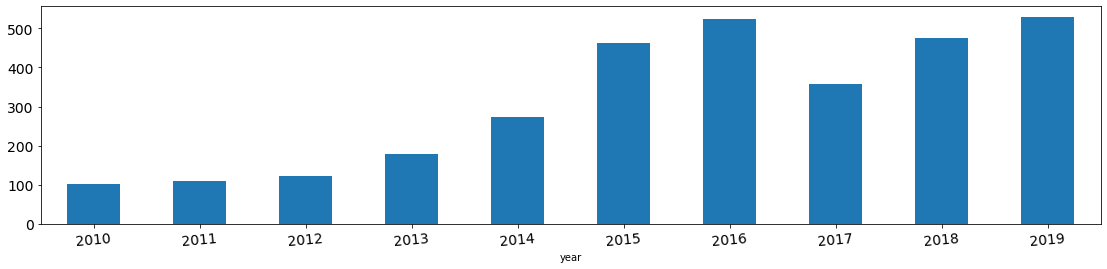

In [72]:
df.groupby('year')['cinema_film'].count().plot(x="year", y="cinema_film", kind="bar", rot=5, fontsize=14, figsize=(19,4))

Как видно из полученных данных, больше всего фильмов выходило в прокат в 2016 и 2019 году. Меньше всего в 2010. Виден рост выхода кино в прокат начиная с 2013 года. В 2017 году был резкий спад, после чего в 2019 году кол-во вернулось к уровню 2016 года.

In [73]:
df.groupby('year').apply(lambda x: len(x[x["cinema_film"] > 0]) / len(x))

year
2010   0.10
2011   0.18
2012   0.21
2013   0.28
2014   0.34
2015   0.66
2016   0.64
2017   0.71
2018   0.53
2019   0.57
dtype: float64

Вывод: как видно из полученных данных больше всего представлены периоды 2015-2017 год. Начиная с 2011 года наблюдался рост представленных данных, резко увеличилась доля в 2015 году. Больше всего данных о прокате фильмов в кинотеатре в 2017 году.

•	Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [74]:
df.groupby('year')['box_office'].sum()

year
2010        2,428,654.00
2011       14,102,765.00
2012        6,955,423.00
2013       29,799,706.20
2014    7,444,951,859.20
2015   39,497,365,196.40
2016   47,866,299,741.91
2017   48,563,707,217.51
2018   49,668,403,134.32
2019   48,425,708,779.59
Name: box_office, dtype: float64

<AxesSubplot:xlabel='year'>

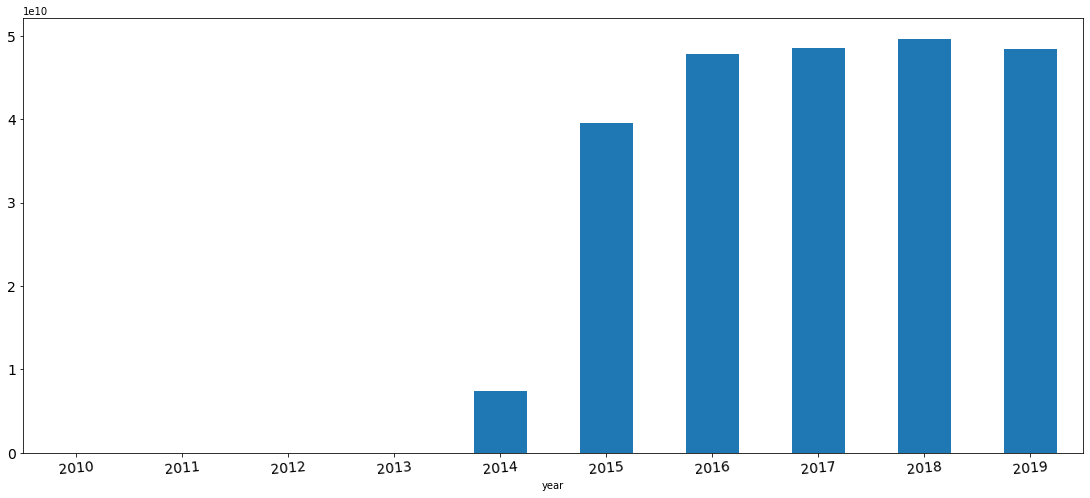

In [75]:
df.groupby('year')['box_office'].sum().plot(x="year", y="box_office", kind="bar", rot=5, fontsize=14, figsize=(19,8))

Вывод: как видно из полученных данных минимальная сумма сборов пришлась на 2010 год. Динамика сборов стала резко расти начиная с 2014 года. Самый сильный скачок наблюдается в 2015 году. В период с 2016 года по 2019 динамика роста прошла. 2019 год собрал сборы немного ниже 2018 года.

•	С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [76]:
df = df[df['box_office'] > 0]
df = df.sort_values(by='box_office', ascending='True')
df.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])

,mean,median
,box_office,box_office
year,,
2010,"24,046.08","1,710.00"
2011,"129,383.17","3,000.00"
2012,"56,548.15","6,220.00"
2013,"166,478.81","3,580.00"
2014,"27,270,885.93","20,400.00"
2015,"85,492,132.46","5,003,450.15"
2016,"91,173,904.27","3,915,041.02"
2017,"136,032,793.33","9,968,340.00"


Вывод: как видно из данных самая большая средняя и медианная по сборам была в 2017 году.

•	Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [77]:
folms_2015_2019 = df[df['year'] > 2014]
folms_2015_2019.groupby('age_restriction')['box_office'].sum()

age_restriction
«0+» - для любой зрительской аудитории      809,077,425.97
«12+» - для детей старше 12 лет          60,619,446,628.33
«16+» - для детей старше 16 лет          76,034,733,643.63
«18+» - запрещено для детей              40,759,615,572.12
«6+» - для детей старше 6 лет            55,798,610,799.68
Name: box_office, dtype: float64

<AxesSubplot:xlabel='age_restriction'>

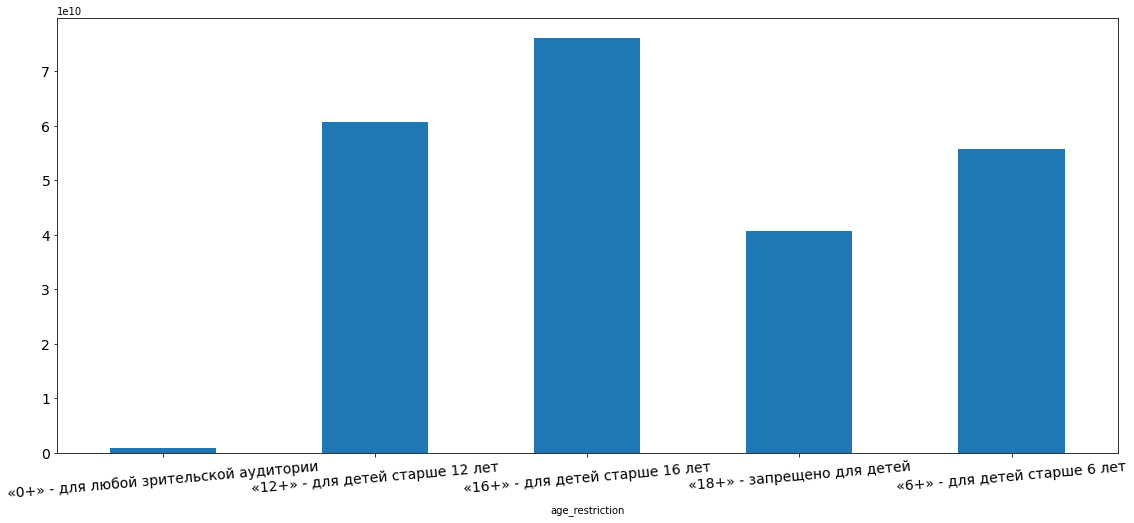

In [78]:
folms_2015_2019.groupby('age_restriction')['box_office'].sum().plot(x="age_restriction", y="box_office", kind="bar", rot=5, fontsize=14, figsize=(19,8))

Вывод: как видно из данных больше всего собирают фильмы из категории «16+» - для детей старше 16 лет. На втором месте «12+» - для детей старше 12 лет, отсюда можно сделать вывод что фильмы для детей собирают больше всего в кино.  Меньше всего «0+» - для любой зрительской аудитории.

In [79]:
folms_2015 = df[df['year'] == 2015]
folms_2015.groupby('age_restriction')['box_office'].sum()

age_restriction
«0+» - для любой зрительской аудитории      379,054,578.37
«12+» - для детей старше 12 лет          13,616,082,008.91
«16+» - для детей старше 16 лет          11,368,120,870.27
«18+» - запрещено для детей               5,432,308,367.44
«6+» - для детей старше 6 лет             8,701,799,371.41
Name: box_office, dtype: float64

<AxesSubplot:xlabel='age_restriction'>

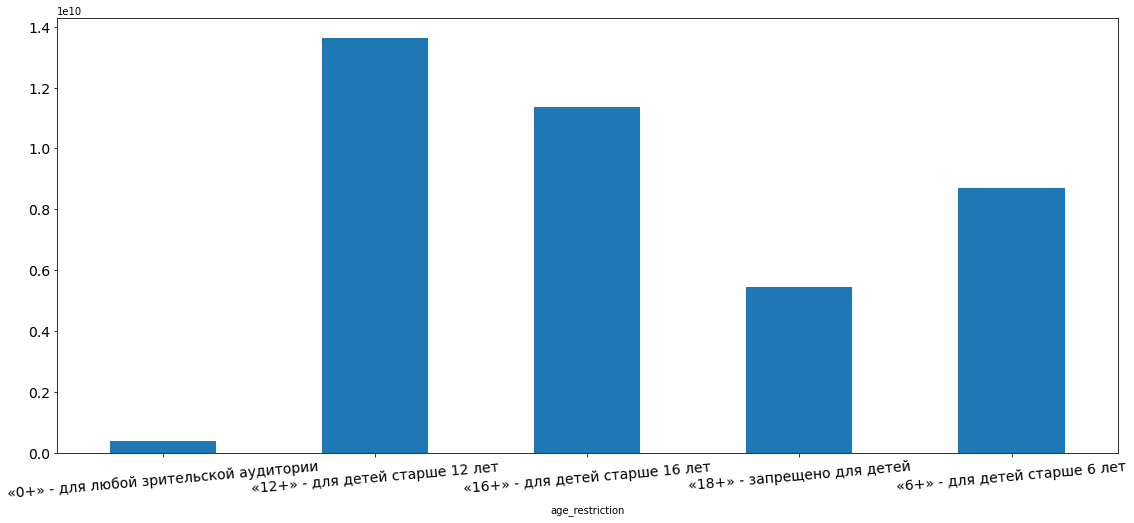

In [80]:

folms_2015.groupby('age_restriction')['box_office'].sum().plot(x="age_restriction", y="box_office", kind="bar", rot=5, fontsize=14, figsize=(19,8))

In [81]:
folms_2016 = df[df['year'] == 2016]
folms_2016.groupby('age_restriction')['box_office'].sum()

age_restriction
«0+» - для любой зрительской аудитории      150,228,848.67
«12+» - для детей старше 12 лет          12,204,446,524.39
«16+» - для детей старше 16 лет          16,664,548,541.74
«18+» - запрещено для детей               6,793,929,818.87
«6+» - для детей старше 6 лет            12,053,146,008.24
Name: box_office, dtype: float64

<AxesSubplot:xlabel='age_restriction'>

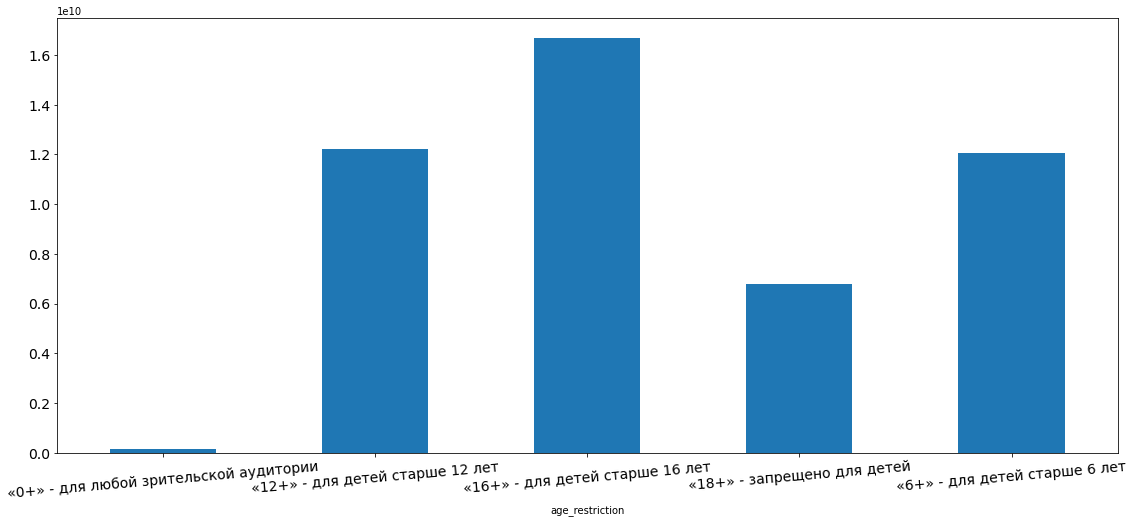

In [82]:

folms_2016.groupby('age_restriction')['box_office'].sum().plot(x="age_restriction", y="box_office", kind="bar", rot=5, fontsize=14, figsize=(19,8))

In [83]:
folms_2017 = df[df['year'] == 2017]
folms_2017.groupby('age_restriction')['box_office'].sum()

age_restriction
«0+» - для любой зрительской аудитории      229,598,930.00
«12+» - для детей старше 12 лет           7,851,427,660.67
«16+» - для детей старше 16 лет          18,745,042,900.06
«18+» - запрещено для детей               9,651,495,581.02
«6+» - для детей старше 6 лет            12,086,142,145.76
Name: box_office, dtype: float64

<AxesSubplot:xlabel='age_restriction'>

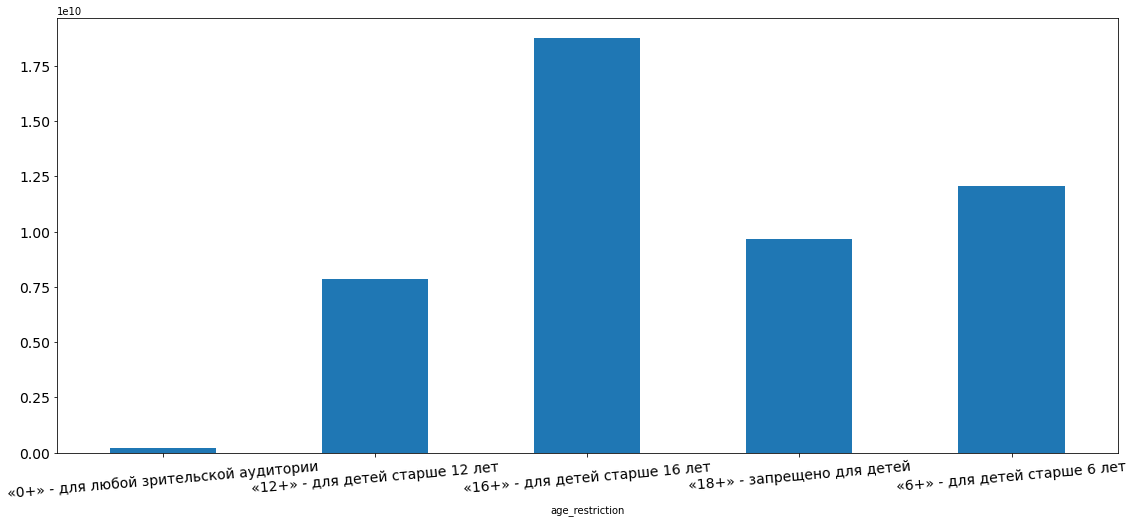

In [84]:

folms_2017.groupby('age_restriction')['box_office'].sum().plot(x="age_restriction", y="box_office", kind="bar", rot=5, fontsize=14, figsize=(19,8))

In [85]:
folms_2018 = df[df['year'] == 2018]
folms_2018.groupby('age_restriction')['box_office'].sum()

age_restriction
«0+» - для любой зрительской аудитории       32,449,002.11
«12+» - для детей старше 12 лет          14,267,291,660.69
«16+» - для детей старше 16 лет          16,503,602,346.96
«18+» - запрещено для детей               8,760,085,501.15
«6+» - для детей старше 6 лет            10,104,974,623.41
Name: box_office, dtype: float64

<AxesSubplot:xlabel='age_restriction'>

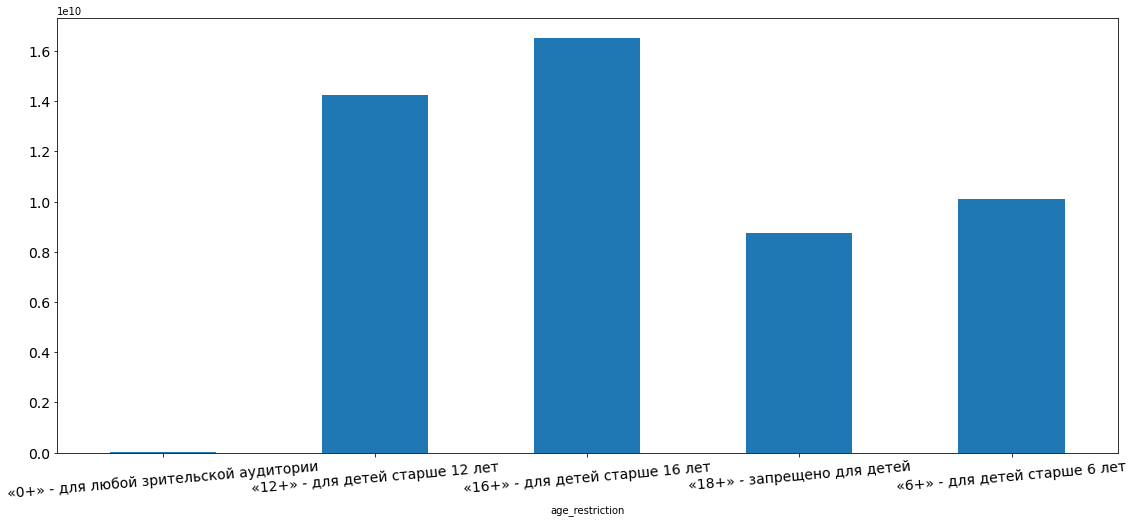

In [86]:

folms_2018.groupby('age_restriction')['box_office'].sum().plot(x="age_restriction", y="box_office", kind="bar", rot=5, fontsize=14, figsize=(19,8))

In [87]:
folms_2019 = df[df['year'] == 2019]
folms_2019.groupby('age_restriction')['box_office'].sum()

age_restriction
«0+» - для любой зрительской аудитории       17,746,066.82
«12+» - для детей старше 12 лет          12,680,198,773.67
«16+» - для детей старше 16 лет          12,753,418,984.60
«18+» - запрещено для детей              10,121,796,303.64
«6+» - для детей старше 6 лет            12,852,548,650.86
Name: box_office, dtype: float64

<AxesSubplot:xlabel='age_restriction'>

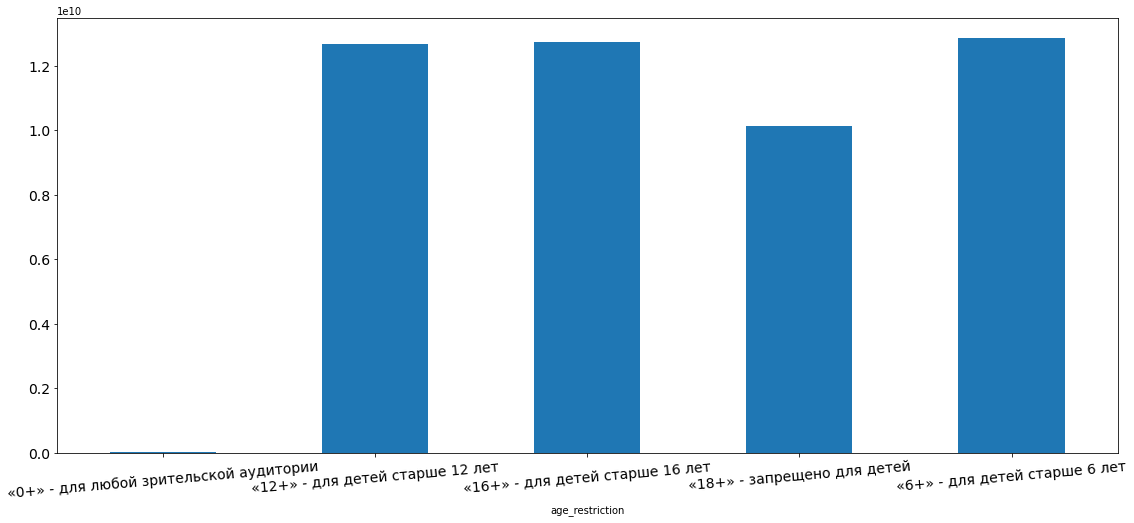

In [88]:

folms_2019.groupby('age_restriction')['box_office'].sum().plot(x="age_restriction", y="box_office", kind="bar", rot=5, fontsize=14, figsize=(19,8))

Проанализируем рейтинги фильмов в этих двух категориях.

In [89]:
folms_2015.pivot_table(index='age_restriction', values='ratings', aggfunc=['mean', 'median'])

,mean,median
,ratings,ratings
age_restriction,,
«0+» - для любой зрительской аудитории,5.38,5.20
«12+» - для детей старше 12 лет,6.56,6.60
«16+» - для детей старше 16 лет,6.19,6.20
«18+» - запрещено для детей,6.14,6.20
«6+» - для детей старше 6 лет,6.12,6.20


In [90]:
folms_2016.pivot_table(index='age_restriction', values='ratings', aggfunc=['mean', 'median'])

,mean,median
,ratings,ratings
age_restriction,,
«0+» - для любой зрительской аудитории,6.62,7.10
«12+» - для детей старше 12 лет,6.12,6.10
«16+» - для детей старше 16 лет,6.20,6.20
«18+» - запрещено для детей,6.15,6.30
«6+» - для детей старше 6 лет,6.19,6.60


In [91]:
folms_2017.pivot_table(index='age_restriction', values='ratings', aggfunc=['mean', 'median'])

,mean,median
,ratings,ratings
age_restriction,,
«0+» - для любой зрительской аудитории,5.73,5.70
«12+» - для детей старше 12 лет,6.29,6.40
«16+» - для детей старше 16 лет,6.31,6.35
«18+» - запрещено для детей,6.20,6.20
«6+» - для детей старше 6 лет,6.17,6.25


In [92]:
folms_2018.pivot_table(index='age_restriction', values='ratings', aggfunc=['mean', 'median'])

,mean,median
,ratings,ratings
age_restriction,,
«0+» - для любой зрительской аудитории,7.85,7.85
«12+» - для детей старше 12 лет,6.45,6.55
«16+» - для детей старше 16 лет,6.36,6.40
«18+» - запрещено для детей,6.15,6.30
«6+» - для детей старше 6 лет,6.39,6.40


In [93]:
folms_2019.pivot_table(index='age_restriction', values='ratings', aggfunc=['mean', 'median'])

,mean,median
,ratings,ratings
age_restriction,,
«0+» - для любой зрительской аудитории,7.20,7.20
«12+» - для детей старше 12 лет,6.55,6.50
«16+» - для детей старше 16 лет,6.35,6.40
«18+» - запрещено для детей,6.12,6.20
«6+» - для детей старше 6 лет,6.43,6.40


Проанализирем кол-во фильмов в этих категориях

In [94]:
folms_2019.groupby('age_restriction')['cinema_film'].count()

age_restriction
«0+» - для любой зрительской аудитории      3
«12+» - для детей старше 12 лет            85
«16+» - для детей старше 16 лет           178
«18+» - запрещено для детей               183
«6+» - для детей старше 6 лет              81
Name: cinema_film, dtype: int64

In [95]:
folms_2018.groupby('age_restriction')['cinema_film'].count()

age_restriction
«0+» - для любой зрительской аудитории      5
«12+» - для детей старше 12 лет            67
«16+» - для детей старше 16 лет           156
«18+» - запрещено для детей               179
«6+» - для детей старше 6 лет              68
Name: cinema_film, dtype: int64

In [96]:
folms_2017.groupby('age_restriction')['cinema_film'].count()

age_restriction
«0+» - для любой зрительской аудитории      3
«12+» - для детей старше 12 лет            41
«16+» - для детей старше 16 лет           121
«18+» - запрещено для детей               147
«6+» - для детей старше 6 лет              45
Name: cinema_film, dtype: int64

In [97]:
folms_2016.groupby('age_restriction')['cinema_film'].count()

age_restriction
«0+» - для любой зрительской аудитории     41
«12+» - для детей старше 12 лет            82
«16+» - для детей старше 16 лет           181
«18+» - запрещено для детей               151
«6+» - для детей старше 6 лет              70
Name: cinema_film, dtype: int64

In [98]:
folms_2015.groupby('age_restriction')['cinema_film'].count()

age_restriction
«0+» - для любой зрительской аудитории     38
«12+» - для детей старше 12 лет            72
«16+» - для детей старше 16 лет           167
«18+» - запрещено для детей               132
«6+» - для детей старше 6 лет              53
Name: cinema_film, dtype: int64

Вывод: как видно из полученных данных только в двух категориях сильно меняется динамика сборов: «12+» - для детей старше 12 лет и «16+» - для детей старше 16 лет. Как видно из полученных данных, скорее всего изменение динамики связано с кол-во фильмов той или иной категории в определенный период.

## Шаг 4. Исследуйте фильмы, которые получили государственную поддержку 

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Расчитаем объем гос поддержки для фильмов, для этого сложим возвратные и невозвратные средства. Результат сохраним в столбец "refundable"

In [99]:
df['refundable'] = df['nonrefundable_support'] + df['refundable_support']

In [100]:
df = df[df['refundable'] > 0]

In [101]:
df.groupby('year')['refundable'].sum()

year
2013     134,347,945.00
2014     572,002,299.00
2015   3,631,241,459.00
2016   4,291,635,482.00
2017   3,148,971,662.00
2018   3,446,969,465.00
2019   4,086,000,000.00
Name: refundable, dtype: float64

Как видно, в период 2010 - 2012 год гос поддержки не было

In [102]:
films_2013_2019 = df[df['year'] > 2012]

<AxesSubplot:xlabel='year'>

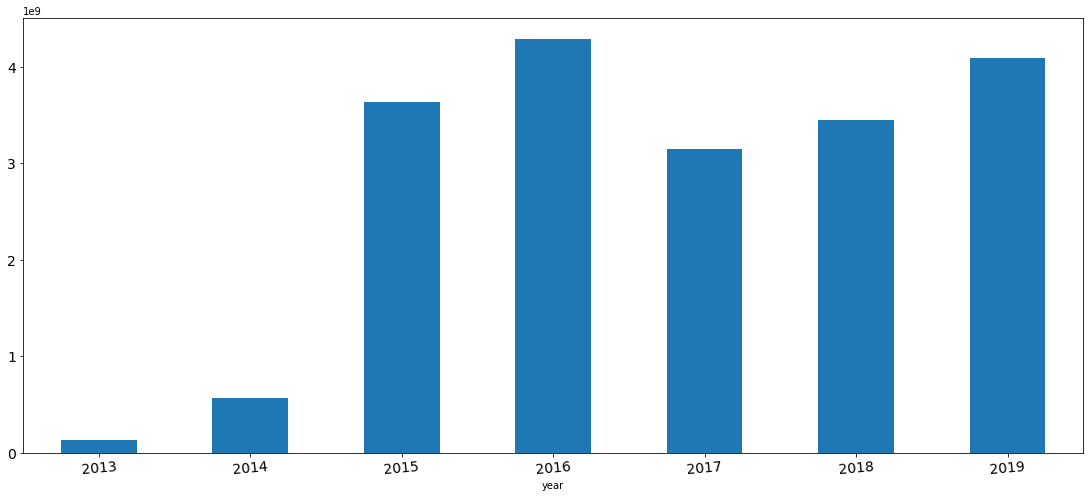

In [103]:
films_2013_2019.groupby('year')['refundable'].sum().plot(x="year", y="refundable", kind="bar", rot=5, fontsize=14, figsize=(19,8))

Как видно из полученных данных резкий скачек гос финансирования был начиная с 2015 года. В 2017 - 2018 году было снижение.

Проанализируем кол-во фильмов с гос поддержкой по годам

In [104]:
films_2013_2019.groupby('year')['refundable'].count()

year
2013     2
2014    16
2015    85
2016    60
2017    39
2018    56
2019    60
Name: refundable, dtype: int64

<AxesSubplot:xlabel='year'>

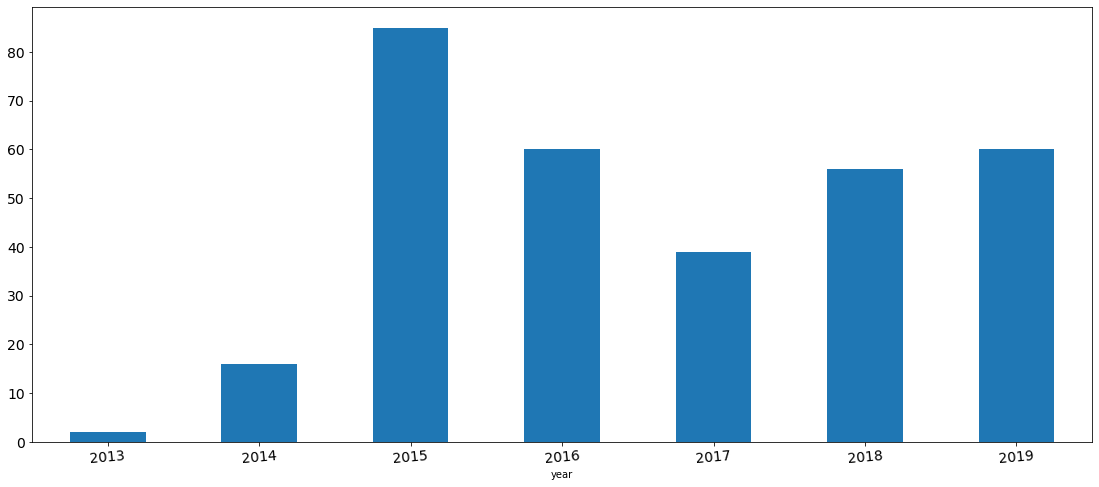

In [105]:
films_2013_2019.groupby('year')['refundable'].count().plot(x="year", y="refundable", kind="bar", rot=5, fontsize=14, figsize=(19,8))

Как видно резкое снижение кол-ва фильмов с гос поддержкой наблюдается в 2017 году, но данная тенденция была обнаружена и для всех фильмов.

Сохраним только фильмы с гос поддержкой

In [106]:
films_2013_2019 = films_2013_2019[films_2013_2019['refundable'] > 0]

Расчитаем на сколько окупаемы данные фильмы, для этого возьмем сборы в кино и вычтим из них бюджет фильма и возвратные средства гос поддержки и сохраним в столбец "payback"

Сначала сохраним только те фильмы, информация осборах в кино которых известна

In [107]:
films_2013_2019 = films_2013_2019[films_2013_2019['box_office'] > 0]

In [108]:
films_2013_2019['payback'] = films_2013_2019['box_office'] - films_2013_2019['budget'] - films_2013_2019['refundable_support']

In [109]:
films_2013_2019.pivot_table(index='year', values='payback', aggfunc=['mean', 'median'])

,mean,median
,payback,payback
year,,
2013,"-117,556,502.45","-117,556,502.45"
2014,"-20,816,413.53","-38,122,768.00"
2015,"-24,935,740.28","-38,805,656.00"
2016,"-34,167,147.15","-52,008,798.00"
2017,"84,080,919.28","-36,811,138.00"
2018,"46,792,399.58","-37,594,026.25"
2019,"-57,224,107.29","-45,909,806.00"


Как видно из данных очень много фильмов не окупаемы. Рассмотрим детально кол-во оккупаемых и не окупаемых фильмов.

In [110]:
payback = films_2013_2019[films_2013_2019['payback'] > 0]
payback.pivot_table(index='year', values='payback', aggfunc=['mean', 'median', 'count'])

,mean,median,count
,payback,payback,payback
year,,,
2014,"93,100,700.17","23,112,954.65",4
2015,"165,450,705.39","100,680,142.40",17
2016,"225,676,342.74","86,884,530.30",12
2017,"416,828,012.67","121,376,968.00",13
2018,"324,028,181.24","154,385,813.43",18
2019,"378,023,615.53","134,871,745.61",11


In [111]:
unpayback = films_2013_2019[films_2013_2019['payback'] < 0]
unpayback.pivot_table(index='year', values='payback', aggfunc=['mean', 'median', 'count'])

,mean,median,count
,payback,payback,payback
year,,,
2013,"-117,556,502.45","-117,556,502.45",2
2014,"-58,788,784.76","-40,150,622.25",12
2015,"-72,532,351.70","-46,313,102.20",68
2016,"-99,128,019.62","-68,133,691.50",48
2017,"-82,292,627.42","-59,190,098.00",26
2018,"-84,529,812.79","-51,353,558.21",38
2019,"-154,932,779.76","-64,805,055.04",49


Вывод: как видно из полученных данных фильмы с гос поддержкой чаще всего не оккупаются. Стоит заметить что самое большое число таких фильмов пришлось на период 2015 год

Так же посмотрим оккупаемость по странам

In [112]:
payback.pivot_table(index='production_country', values='payback', aggfunc=['mean', 'median', 'count'])

,mean,median,count
,payback,payback,payback
production_country,,,
Россия,"285,744,073.77","100,532,518.70",74
"Россия, Сербия","157,650,644.24","157,650,644.24",1


In [113]:
unpayback.pivot_table(index='production_country', values='payback', aggfunc=['mean', 'median', 'count'])

,mean,median,count
,payback,payback,payback
production_country,,,
Россия,"-93,168,178.51","-51,689,506.00",233
"Россия, Армения","-114,636,769.77","-114,636,769.77",1
"Россия, Германия","-200,068,893.50","-200,068,893.50",2
"Россия, Германия, Великобритания","-147,692,879.99","-147,692,879.99",1
"Россия, Германия, Казахстан, Польша, Китай","-106,072,102.00","-106,072,102.00",1
"Россия, Италия","-432,455,966.64","-432,455,966.64",2
"Россия, Латвия, Чешская Республика","-55,549,215.47","-55,549,215.47",1
"Россия, Украина, Польша","-95,705,578.70","-95,705,578.70",1


Вывод: из полученных данных можно видеть что фильмы с гос поддержкой выходят только в России. Так же можно сделать вывод что фильмы снятые при участии других стран чаще всего не оккупаются, но не больше всего т.к. в основном все фильмы сняты в России

Рассмотрим рейтинг фильмов с гос поддержкой

<AxesSubplot:>

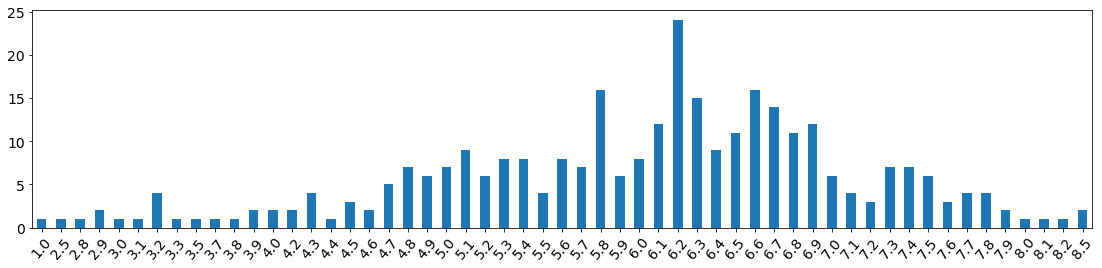

In [114]:
films_2013_2019['ratings'].value_counts().sort_index(ascending=True).plot(x="ratings", y="ratings", kind="bar", rot=50, fontsize=14, figsize=(19,4))

Вывод: как видно из результата фильмы с гос поддержкой чаще всего имеют средний рейтинг.

## Шаг 5. Напишите общий вывод

Вывод: из полученных данных можно сделать вывод что основные тренды кино это мультфильмы, они больше всего собирают в кино. Фильмы с гос поддержкой имеют средний интерес для зрителей, об этом говорят средние рейтинги и сборы. Оккупаемость данных фильмов плохая, они чаще всего не оккупаются. Сильное различие средней и медианой связано с тем, что фильмы есть фильмы с сильным отклонением от среднего значения как с очень маленькими бюджетами, так и с очень большими.